In [12]:
import numpy as np

In [13]:
import chardet
with open('tripadvisor_hotel_reviews.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'windows-1251', 'confidence': 0.99, 'language': 'Russian'}

In [14]:
import pandas as pd
df = pd.read_csv('tripadvisor_hotel_reviews.csv', encoding='windows-1251')
df.head

<bound method NDFrame.head of     selection1_name,"selection1_selection2_name","selection1_selection2_selection3","selection1_selection2_selection3_url"
0    Глэмпинг Доброе,"Плюсы: Очень красивая заповед...                                                                    
1    Глэмпинг Доброе,"Ездили в глэмпинг Доброе комп...                                                                    
2    Глэмпинг Доброе,"Из плюсов: красивая заповедна...                                                                    
3    Глэмпинг Доброе,"Красиво, дикая природа с идеа...                                                                    
4    Глэмпинг Доброе,"Все отлично, но с газом надо ...                                                                    
..                                                 ...                                                                    
100  Eko-camping SFERA,"Сама по себе идея вообще ог...                                                       

In [15]:
df.rename(columns = {'selection1_name,"selection1_selection2_name","selection1_selection2_selection3","selection1_selection2_selection3_url"': 'reviews'}, inplace = True)

In [16]:
places = []
reviews = []

for element in range(df.size):
    place = df['reviews'][element].split('"')[0]
    review = df['reviews'][element].split('"')[1]
    places.append(place)
    reviews.append(review)
    
df = pd.DataFrame({'places': places, 'reviews':reviews})
df

places                                            reviews
0       Глэмпинг Доброе,  Плюсы: Очень красивая заповедная зона, просыпа...
1       Глэмпинг Доброе,  Ездили в глэмпинг Доброе компанией в конце апр...
2       Глэмпинг Доброе,  Из плюсов: красивая заповедная зона, потрясающ...
3       Глэмпинг Доброе,  Красиво, дикая природа с идеальным комфортом, ...
4       Глэмпинг Доброе,  Все отлично, но с газом надо что то делать. Мо...
..                   ...                                                ...
100   Eko-camping SFERA,  Сама по себе идея вообще огонь (если говорить ...
101   Eko-camping SFERA,  При заселении проводили нас в наш геокупол #1 ...
102   Eko-camping SFERA,  эко кемпинг SFERA - купол плюсы - красивая при...
103    СПА ЛЕС глэмпинг,                                                   
104  Глэмпинг Под Небом,                                                   

[105 rows x 2 columns]

In [17]:
df1 = df.copy()
places1 = []
data = {}

for row in range(len(df1.index)):
    if df1.iat[row, 0] not in places1:
        places1.append(df1.iat[row, 0])
        df2 = df1[df1['places'] == df1.iat[row, 0]]
        tem = []
        for i in range(len(df2.index)):
            tem.append(df2.iat[i, 1].lower())
        data[df1.iat[row, 0]] = tem

reviews1 = []*len(places1)

for i in range(len(places1)):
    reviews1.append(data[places1[i]])
#     reviews1[i] = ' '.join(reviews1[i])

In [18]:
for i in range(len(places1)):
    places1[i] = places1[i][:-1]

In [19]:
new = pd.DataFrame({'places': places1, 'collected_reviews': reviews1})

In [20]:
new

places  \
0                 Глэмпинг Доброе   
1           Глэмпинг на озере Сиг   
2            Глэмпинг Видно Озеро   
3                Глэмпинг Vezzika   
4              ЛЕС Глэмпинг и спа   
5                Глэмпинг NewCamp   
6             Urman Camp Глэмпинг   
7            Велна Эко Спа Резорт   
8              Глэмпинг Под небом   
9                     Гуляй-Город   
10         Глэмпинг Китовый Берег   
11                 Zelenaya Tropa   
12                    Мамонт Camp   
13                          Скала   
14              Халактырский пляж   
15                          Шикша   
16           База отдыха Салокюля   
17                 Дальний кордон   
18                        Айвенго   
19                     Папоротник   
20               Polyana Glamping   
21             Кемпинг Лес и Море   
22  Майтри Кэмп на Финском Заливе   
23         Глэмпинг Северный Крым   
24         Трувор Глэмпинг Валдай   
25          Глемпинг Старый Сивух   
26              Долина мечтателей   
27              Eko-camping SFERA   
28               СПА ЛЕС глэмпинг   
29             Глэмпинг Под Небом   

                                    collected_reviews  
0   [плюсы: очень красивая заповедная зона, просып...  
1   [отдыхала одна с двумя детьми. очень повезло с...  
2   [забронировал проживание в глэмпинге , случайн...  
3   [плюсы: - хорошее и красивое местоположение ми...  
4   [решили мы посетить это чудесное место , забро...  
5   [глэмпинг находится близ посёлка эссойла, в со...  
6   [приехали в глэмпинг к 5 попросили заранее зат...  
7   [мне есть с чем сравнивать, поэтому посетив за...  
8   [отличные условия проживания, очень отзывчивый...  
9   [приехали сегодня после дороги и музея в серпу...  
10  [мы не могли и предположить, что получим столь...  
11  [итак, вы платите 30 000 рублей за две ночи, б...  
12  [потрясающее единение комфорта, уюта, невероят...  
13  [проживали в домике с видом на море. ощутил по...  
14                                                 []  
15  [прекрасное места для отдыха душой и телом. бе...  
16  [отдыхали в этом чудесном местечке неделю в се...  
17  [турбаза находится недалеко от москвы - пример...  
18  [выбрали отдых на алтае как альтернативу поезд...  
19  [решили отдохнуть в карелии. выбрали это место...  
20  [потрясающая локация, идеальное место, чтобы п...  
21  [отдыхали 3 ночи, с малышом 6 мес и собакой дж...  
22  [место очень красивое, живописное! финский зал...  
23  [не реклама...:)...довелось проездом сутки на ...  
24  [атмосферное, уютное и очень душевное место. у...  
25  [выходные пролетели как маленькая жизнь! они б...  
26                                                 []  
27  [были два дня назад. место волшебное - ощущени...  
28                                                 []  
29                                                 []

## Cleaning data

In [21]:
import re
import string

In [22]:
import nltk
import pymorphy2
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [23]:
stop = stopwords.words('russian')
stop.remove('хорошо')
stop.append('это')
stop.append('место')
stop.append('персонал')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocessing(review):
    
    # data cleaning
    review = review.lower()
    review = re.sub(r'((www.\.\[^\s]+)|(https?://[^\s]+))', r'', review)
    review = re.sub(r'@[^\s]+', r'', review)
    review = re.sub(r'\W*\b\w{1,3}\b', r'', review)
    
    token = nltk.word_tokenize(review)
    
    review = [word for word in token if (word not in stop and word not in string.punctuation 
                                         and word != "' '" and word != "``" and word != "''" and word.isnumeric() == False) ]
    
    review = ' '.join(pymorphy2.MorphAnalyzer().parse(word)[0].normal_form for word in review)
#     review = [lemmatizer.lemmatize(word) for word in review]
#     review = ' '.join(review)
    
    return review 

In [24]:
def prepareOnePlaceReviews(reviews):
    for i in range(len(reviews)):
        reviews[i] = preprocessing(reviews[i])
    return reviews

In [25]:
new['collected_reviews'] = new['collected_reviews'].apply(lambda reviews: prepareOnePlaceReviews(reviews))

In [26]:
new_temp = new.copy()

In [27]:
new['collected_reviews'][0]

['плюс очень красивый заповедный зона просыпаться вид море засыпать волна пожалуй самый необычный отпуск вроде жить палатка минимальный набор необходимый комфортный пребывание идеальный вариант мечтать сходить поход палатка перспектива ходить туалет ёлка точно очень расслаблять помогать отдохнуть городской суета ярко минус готовый глэмпинг тяжело добраться неподготовленный человек добраться два способ пешком моторный лодка лодка стоить поездка конец сам глэмпинг причал деревянный помост поэтому лодка прийтись прыгать вода забираться лодка вода',
 'ездить глэмпинг добрый компания конец апрель поскольку апрель действительно выдаться холодный делать больший скидка этот место откинуть наш погодный невезение сильно разочаровать соотношение',
 'плюс красивый заповедный зона потрясать закат вкусный мидия блинчик завтрак очень приятный вежливый молодой человек который собственно приносить завтрак минус везде грязненький очень бросаться глаз жутко неудобный скрипучий кровать который спина болет

## Machine Learning

In [28]:
import numpy as np
import re
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout, Embedding
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [29]:
f = open('C:\\Users\\anast\\jupyter_notebook\\Anastasia_Notes\\Project TripAdvisor\\train_data_true.txt', 'r', encoding='utf-8')
texts_true = f.readlines()
texts_true[0] = texts_true[0].replace('\ufeff','')

In [30]:
f = open('C:\\Users\\anast\\jupyter_notebook\\\Anastasia_Notes\\Project TripAdvisor\\train_data_false.txt', 'r', encoding='utf-8')
texts_false = f.readlines()
texts_false[0] = texts_false[0].replace('\ufeff','')

In [31]:
texts = texts_true + texts_false
count_true = len(texts_true)
count_false = len(texts_false)
total_lines = count_true + count_false
print(count_true,count_false,total_lines)

110 109 219


In [32]:
maxWordsCount = 2000
tokenizer = Tokenizer(num_words=maxWordsCount, filters='!–"—#$%&amp;()*+,-./:;<=>?@[\\]^_`{|}~\t\n\r«»', lower=True, split=' ', char_level=False)
tokenizer. fit_on_texts (texts)

In [33]:
data = tokenizer.texts_to_sequences(texts)
max_text_len = 10
data_pad = pad_sequences(data, maxlen=max_text_len)
print(data_pad)
print(data_pad.shape)

[[ 226   57    2 ...  228  229  230]
 [   0    5  231 ...  234    3   77]
 [ 235    3   77 ...    5  237  238]
 ...
 [   0    0    0 ... 1048    2 1049]
 [   0    0    0 ...  196 1050 1051]
 [   0    0    0 ...    8  189  215]]
(219, 10)


In [34]:
X = data_pad
Y = np.array([[1, 0]]*count_true + [[0, 1]]*count_false)
print(X.shape, Y.shape)

(219, 10) (219, 2)


In [35]:
indeces = np.random.choice(X.shape[0], size=X.shape[0], replace=False)
X = X[indeces]
Y = Y[indeces]

In [36]:
model = Sequential()
model.add(Embedding(maxWordsCount, 128, input_length = max_text_len))
model.add(LSTM(64, activation='tanh', return_sequences=True))
model.add(LSTM(32, activation='tanh'))
model.add(Dense(2, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', metrics = ['accuracy'], optimizer = Adam(0.0001))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 10, 128)           256000    
                                                                 
 lstm (LSTM)                 (None, 10, 64)            49408     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 2)                 66        
                                                                 
Total params: 317,890
Trainable params: 317,890
Non-trainable params: 0
_________________________________________________________________


In [37]:
history = model.fit(X, Y, batch_size=32, epochs=50)

Epoch 1/50
7/7 [==============================] - 3s 8ms/step - loss: 0.6920 - accuracy: 0.5388
Epoch 2/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.6575
Epoch 3/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6874 - accuracy: 0.7078
Epoch 4/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6848 - accuracy: 0.7306
Epoch 5/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6821 - accuracy: 0.7489
Epoch 6/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6788 - accuracy: 0.7854
Epoch 7/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6752 - accuracy: 0.7854
Epoch 8/50
7/7 [==============================] - 0s 8ms/step - loss: 0.6704 - accuracy: 0.7945
Epoch 9/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6653 - accuracy: 0.7945
Epoch 10/50
7/7 [==============================] - 0s 9ms/step - loss: 0.6581 - accuracy: 0.7945
Epoch 11/50
7/7 [======================

In [38]:
strings = new.shape[0]

In [39]:
def res_to_string(result):
    count_all_positive = 0
    count_all_negative = 0
    if (result[0][0] < result[0][1]):
        count_all_negative += 1;
    elif (result[0][0]) > (result[0][1]):
        count_all_positive += 1;
    return [count_all_positive,count_all_negative]

In [40]:
tup_pos = []
tup_neg = []
tup = []

for i in range(strings):
    a = 0
    b = 0
    tup_tonality = []*len(new.iat[i,1])
    for j in range(len(new.iat[i,1])):
        t = new.iat[i,1][j]
        data = tokenizer.texts_to_sequences([t])
        data_pad = pad_sequences(data, maxlen = max_text_len)
        res = model.predict(data_pad)
        tup_tonality.append(res_to_string(res))
#         print(res_to_string(res))
        a += res_to_string(res)[0]
        b += res_to_string(res)[1]
    tup_pos.append(a)
    tup_neg.append(b)
    tup.append(tup_tonality)

1/1 [==============================] - 0s 19ms/step


## Preparation for Clouds (positive vs negative)

In [42]:
# new_temp = new[['places', 'collected_reviews']]
new_temp['tonality_of_each_review'] = tup
# new_temp

In [45]:
positive = []
negative = []

for p in range(len(new_temp.index)):
    
    pos_reviews = []
    neg_reviews = []

    for k in range(len(new_temp.iat[p,2])):
        if new_temp.iat[p,2][k] == [1,0]:
            pos_reviews.append(new_temp.iat[p,1][k])
        else:
            neg_reviews.append(new_temp.iat[p,1][k])
    positive.append(pos_reviews)
    negative.append(neg_reviews)


new_temp['positive_reviews'] = positive
new_temp['negative_reviews'] = negative
# new_temp

In [46]:
ready_for_clouds = new_temp[['places', 'positive_reviews', 'negative_reviews']]
ready_for_clouds

places  \
0                 Глэмпинг Доброе   
1           Глэмпинг на озере Сиг   
2            Глэмпинг Видно Озеро   
3                Глэмпинг Vezzika   
4              ЛЕС Глэмпинг и спа   
5                Глэмпинг NewCamp   
6             Urman Camp Глэмпинг   
7            Велна Эко Спа Резорт   
8              Глэмпинг Под небом   
9                     Гуляй-Город   
10         Глэмпинг Китовый Берег   
11                 Zelenaya Tropa   
12                    Мамонт Camp   
13                          Скала   
14              Халактырский пляж   
15                          Шикша   
16           База отдыха Салокюля   
17                 Дальний кордон   
18                        Айвенго   
19                     Папоротник   
20               Polyana Glamping   
21             Кемпинг Лес и Море   
22  Майтри Кэмп на Финском Заливе   
23         Глэмпинг Северный Крым   
24         Трувор Глэмпинг Валдай   
25          Глемпинг Старый Сивух   
26              Долина мечтателей   
27              Eko-camping SFERA   
28               СПА ЛЕС глэмпинг   
29             Глэмпинг Под Небом   

                                     positive_reviews  \
0   [плюс очень красивый заповедный зона просыпать...   
1   [отдыхать один два ребёнок очень повезти погод...   
2                                                  []   
3   [плюс хороший красивый местоположение минус ин...   
4   [решить посетить чудесный забронировать значит...   
5                                                  []   
6   [отдохнуть тело душа замечательный место домик...   
7   [сравнивать поэтому посетить загородный-отель ...   
8   [отличный условие проживание очень отзывчивый ...   
9   [приехать сегодня дорога музей серпухов доброж...   
10                                                 []   
11  [итак платить рубль ночь доплачивать три килог...   
12  [потрясать единение комфорт уют невероятно вку...   
13  [проживать домик вид море ощутить полный идилл...   
14                                                 []   
15  [прекрасный место отдых душа тело бескрайний в...   
16  [отдыхать чудесный местечко неделя сентябрь се...   
17  [турбаза находиться недалеко москва примерно м...   
18  [любитель отель включить » предсказуемость ком...   
19  [решить отдохнуть карелия выбрать думать отдох...   
20  [потрясать локация идеальный провести время ка...   
21  [отдыхать ночь малыш собака джек рассесть терь...   
22  [понравиться передать природа просто восторг д...   
23                                                 []   
24  [атмосферный уютный очень душевный уединение с...   
25  [выходной пролететь маленький жизнь насыщенный...   
26                                                 []   
27  [назад волшебный ощущение побывать настоящий с...   
28                                                 []   
29                                                 []   

                                     negative_reviews  
0                                                  []  
1   [муж глэмпинг август 2019г проехать 950км мест...  
2   [забронировать проживание глэмпинг, случайно о...  
3                                                  []  
4   [кемпинг подойти исключительно семья ребёнок п...  
5   [глэмпинг находиться близ посёлок эссойло сосн...  
6   [приехать глэмпинг попросить заранее затопить ...  
7   [неплохой весь семья возможно приезжать готовы...  
8   [написать уточнить деталь прочитать забыть гол...  
9                                                  []  
10  [мочь предположить получить столько новый эмоц...  
11  [явно точно понимать соответствие цена качеств...  
12                                                 []  
13  [спонтанный поездка случайно наслать глемпинг ...  
14                                                 []  
15  [шикарный отдых шикарный шалаш третий ездить с...  
16                                                 []  
17                                                 []  
18  [выбрать отдых алтай альтернатива поездка м

In [47]:
new['Number of positive reviews'] = tup_pos
new['Number of negative reviews'] = tup_neg
for i in range(strings):
    if new.iat[i,1] == ['']:
        new.iat[i,3] = new.iat[i,2]

new['Total number of reviews'] = new['Number of positive reviews'] + new['Number of negative reviews']
new

places  \
0                 Глэмпинг Доброе   
1           Глэмпинг на озере Сиг   
2            Глэмпинг Видно Озеро   
3                Глэмпинг Vezzika   
4              ЛЕС Глэмпинг и спа   
5                Глэмпинг NewCamp   
6             Urman Camp Глэмпинг   
7            Велна Эко Спа Резорт   
8              Глэмпинг Под небом   
9                     Гуляй-Город   
10         Глэмпинг Китовый Берег   
11                 Zelenaya Tropa   
12                    Мамонт Camp   
13                          Скала   
14              Халактырский пляж   
15                          Шикша   
16           База отдыха Салокюля   
17                 Дальний кордон   
18                        Айвенго   
19                     Папоротник   
20               Polyana Glamping   
21             Кемпинг Лес и Море   
22  Майтри Кэмп на Финском Заливе   
23         Глэмпинг Северный Крым   
24         Трувор Глэмпинг Валдай   
25          Глемпинг Старый Сивух   
26              Долина мечтателей   
27              Eko-camping SFERA   
28               СПА ЛЕС глэмпинг   
29             Глэмпинг Под Небом   

                                    collected_reviews  \
0   [плюс очень красивый заповедный зона просыпать...   
1   [отдыхать один два ребёнок очень повезти погод...   
2   [забронировать проживание глэмпинг, случайно о...   
3   [плюс хороший красивый местоположение минус ин...   
4   [решить посетить чудесный забронировать значит...   
5   [глэмпинг находиться близ посёлок эссойло сосн...   
6   [приехать глэмпинг попросить заранее затопить ...   
7   [сравнивать поэтому посетить загородный-отель ...   
8   [отличный условие проживание очень отзывчивый ...   
9   [приехать сегодня дорога музей серпухов доброж...   
10  [мочь предположить получить столько новый эмоц...   
11  [итак платить рубль ночь доплачивать три килог...   
12  [потрясать единение комфорт уют невероятно вку...   
13  [проживать домик вид море ощутить полный идилл...   
14                                                 []   
15  [прекрасный место отдых душа тело бескрайний в...   
16  [отдыхать чудесный местечко неделя сентябрь се...   
17  [турбаза находиться недалеко москва примерно м...   
18  [выбрать отдых алтай альтернатива поездка море...   
19  [решить отдохнуть карелия выбрать думать отдох...   
20  [потрясать локация идеальный провести время ка...   
21  [отдыхать ночь малыш собака джек рассесть терь...   
22  [очень красивый живописный финский залив велик...   
23  [реклама ... ... довестись проезд сутки база п...   
24  [атмосферный уютный очень душевный уединение с...   
25  [выходной пролететь маленький жизнь насыщенный...   
26                                                 []   
27  [назад волшебный ощущение побывать настоящий с...   
28                                                 []   
29                                                 []   

    Number of positive reviews  Number of negative reviews  \
0                            5                           0   
1                            4                           1   
2                            0                           2   
3                            4                           0   
4                            3                           2   
5                            0                           1   
6                            4                           1   
7                            4                           1   
8                            2                           3   
9                            5                           0   
10                           0                           1   
11                           4                           1   
12                           3                           0   
13                           4                           1   
14                           0                           0   
15                           2                           2   
16                           5                           

## Raiting  
#### range [1, 5], where 1 - terrible, 2- bad, 3 - average, 4 - good, 5 - excellent

### Conditions:
#### if num of positive reviews > 1.25 negative reviews => rating=5
#### if (num of positive reviews < 1.25 negative reviews) & (num of positive reviews > negative reviews )  => rating=4
#### if num of positive reviews == negative reviews => rating=3
#### if (num of positive reviews < negative reviews) & (num of 1.25 positive reviews > negative reviews) => rating=2
#### if (1.25 num of positive reviews < negative reviews => rating=1

In [48]:
conditions = [(new['Number of positive reviews'] > 1.25 * new['Number of negative reviews']),
              (new['Number of positive reviews'] < 1.25 * new['Number of negative reviews']) 
               & (new['Number of positive reviews'] > new['Number of negative reviews']), 
              (new['Number of positive reviews'] != 0) & (new['Number of negative reviews'] != 0) 
              & (new['Number of positive reviews'] == new['Number of negative reviews']), 
              (new['Number of positive reviews'] < new['Number of negative reviews']) 
               & (1.25*new['Number of positive reviews'] > new['Number of negative reviews']), 
              (1.25*new['Number of positive reviews'] < new['Number of negative reviews']),
             (new['Number of positive reviews'] ==0) & (new['Number of negative reviews'] == 0)]
five, four, three, two, one, zero = 5, 4, 3, 2, 1, 0
output = [five, four, three, two, one, zero]
new['Rating'] = np.select(conditions, output)
new_sorted = new.sort_values(by=['Rating'], ascending = False)
new_sorted.drop(columns=['collected_reviews'])

places  Number of positive reviews  \
0                 Глэмпинг Доброе                           5   
20               Polyana Glamping                           2   
18                        Айвенго                           4   
17                 Дальний кордон                           3   
16           База отдыха Салокюля                           5   
1           Глэмпинг на озере Сиг                           4   
21             Кемпинг Лес и Море                           5   
13                          Скала                           4   
12                    Мамонт Camp                           3   
11                 Zelenaya Tropa                           4   
22  Майтри Кэмп на Финском Заливе                           4   
9                     Гуляй-Город                           5   
24         Трувор Глэмпинг Валдай                           2   
7            Велна Эко Спа Резорт                           4   
6             Urman Camp Глэмпинг                           4   
25          Глемпинг Старый Сивух                           1   
4              ЛЕС Глэмпинг и спа                           3   
3                Глэмпинг Vezzika                           4   
27              Eko-camping SFERA                           4   
19                     Папоротник                           4   
15                          Шикша                           2   
10         Глэмпинг Китовый Берег                           0   
23         Глэмпинг Северный Крым                           0   
8              Глэмпинг Под небом                           2   
5                Глэмпинг NewCamp                           0   
2            Глэмпинг Видно Озеро                           0   
14              Халактырский пляж                           0   
26              Долина мечтателей                           0   
28               СПА ЛЕС глэмпинг                           0   
29             Глэмпинг Под Небом                           0   

    Number of negative reviews  Total number of reviews  Rating  
0                            0                        5       5  
20                           1                        3       5  
18                           1                        5       5  
17                           0                        3       5  
16                           0                        5       5  
1                            1                        5       5  
21                           0                        5       5  
13                           1                        5       5  
12                           0                        3       5  
11                           1                        5       5  
22                           1                        5       5  
9                            0                        5       5  
24                           0                        2       5  
7                            1                        5       5  
6                            1                        5       5  
25                           0                        1       5  
4                            2                        5       5  
3                            0                        4       5  
27                           1                        5       5  
19                           1                        5       5  
15                           2                        4       3  
10                           1                        1       1  
23                           2                        2       1  
8                            3                        5       1  
5                            1                        1       1  
2                            2                        2       1  
14                           0                        0       0  
26                           0                        0       0  
28                           0                        0       0  
29                           0 

In [49]:
new_sorted.to_csv('ready.csv')

In [50]:
new

places  \
0                 Глэмпинг Доброе   
1           Глэмпинг на озере Сиг   
2            Глэмпинг Видно Озеро   
3                Глэмпинг Vezzika   
4              ЛЕС Глэмпинг и спа   
5                Глэмпинг NewCamp   
6             Urman Camp Глэмпинг   
7            Велна Эко Спа Резорт   
8              Глэмпинг Под небом   
9                     Гуляй-Город   
10         Глэмпинг Китовый Берег   
11                 Zelenaya Tropa   
12                    Мамонт Camp   
13                          Скала   
14              Халактырский пляж   
15                          Шикша   
16           База отдыха Салокюля   
17                 Дальний кордон   
18                        Айвенго   
19                     Папоротник   
20               Polyana Glamping   
21             Кемпинг Лес и Море   
22  Майтри Кэмп на Финском Заливе   
23         Глэмпинг Северный Крым   
24         Трувор Глэмпинг Валдай   
25          Глемпинг Старый Сивух   
26              Долина мечтателей   
27              Eko-camping SFERA   
28               СПА ЛЕС глэмпинг   
29             Глэмпинг Под Небом   

                                    collected_reviews  \
0   [плюс очень красивый заповедный зона просыпать...   
1   [отдыхать один два ребёнок очень повезти погод...   
2   [забронировать проживание глэмпинг, случайно о...   
3   [плюс хороший красивый местоположение минус ин...   
4   [решить посетить чудесный забронировать значит...   
5   [глэмпинг находиться близ посёлок эссойло сосн...   
6   [приехать глэмпинг попросить заранее затопить ...   
7   [сравнивать поэтому посетить загородный-отель ...   
8   [отличный условие проживание очень отзывчивый ...   
9   [приехать сегодня дорога музей серпухов доброж...   
10  [мочь предположить получить столько новый эмоц...   
11  [итак платить рубль ночь доплачивать три килог...   
12  [потрясать единение комфорт уют невероятно вку...   
13  [проживать домик вид море ощутить полный идилл...   
14                                                 []   
15  [прекрасный место отдых душа тело бескрайний в...   
16  [отдыхать чудесный местечко неделя сентябрь се...   
17  [турбаза находиться недалеко москва примерно м...   
18  [выбрать отдых алтай альтернатива поездка море...   
19  [решить отдохнуть карелия выбрать думать отдох...   
20  [потрясать локация идеальный провести время ка...   
21  [отдыхать ночь малыш собака джек рассесть терь...   
22  [очень красивый живописный финский залив велик...   
23  [реклама ... ... довестись проезд сутки база п...   
24  [атмосферный уютный очень душевный уединение с...   
25  [выходной пролететь маленький жизнь насыщенный...   
26                                                 []   
27  [назад волшебный ощущение побывать настоящий с...   
28                                                 []   
29                                                 []   

    Number of positive reviews  Number of negative reviews  \
0                            5                           0   
1                            4                           1   
2                            0                           2   
3                            4                           0   
4                            3                           2   
5                            0                           1   
6                            4                           1   
7                            4                           1   
8                            2                           3   
9                            5                           0   
10                           0                           1   
11                           4                           1   
12                           3                           0   
13                           4                           1   
14                           0                           0   
15                           2                           2   
16                           5                           

## WordClouds


In [52]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [107]:
# t = ready_for_clouds.copy()

Глэмпинг Доброе


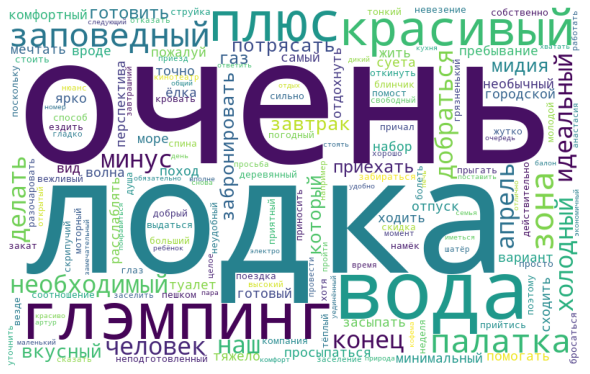

Глэмпинг на озере Сиг


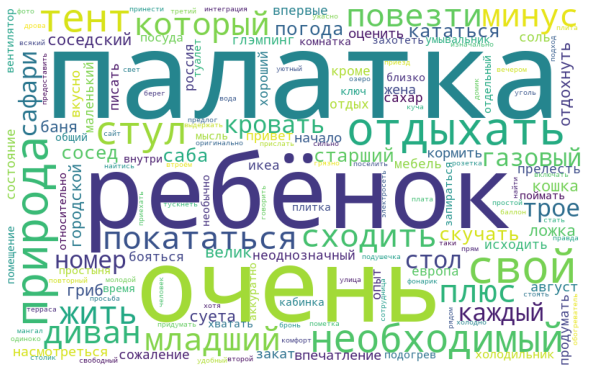

Глэмпинг Видно Озеро
Глэмпинг Vezzika


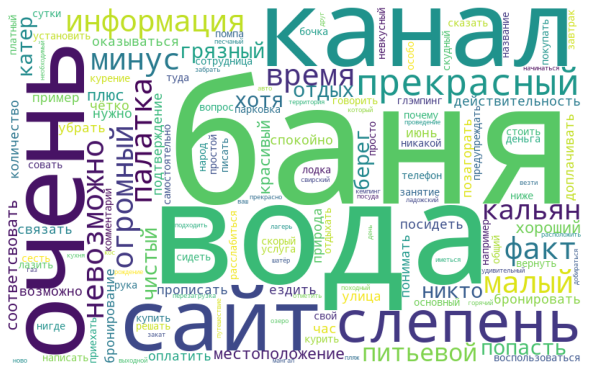

ЛЕС Глэмпинг и спа


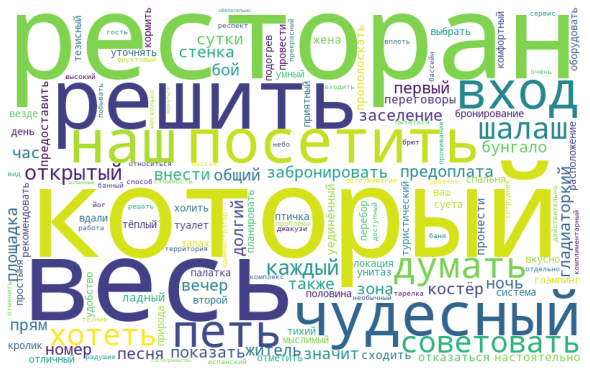

Глэмпинг NewCamp
Urman Camp Глэмпинг


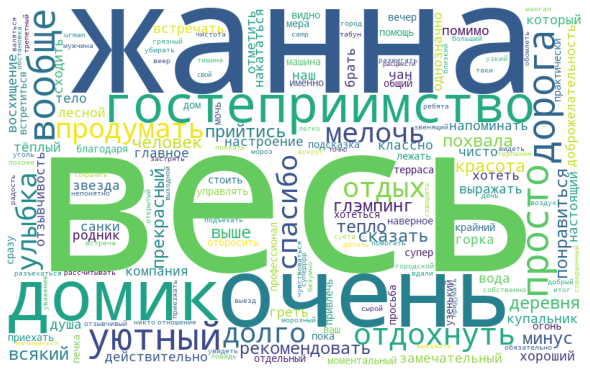

Велна Эко Спа Резорт


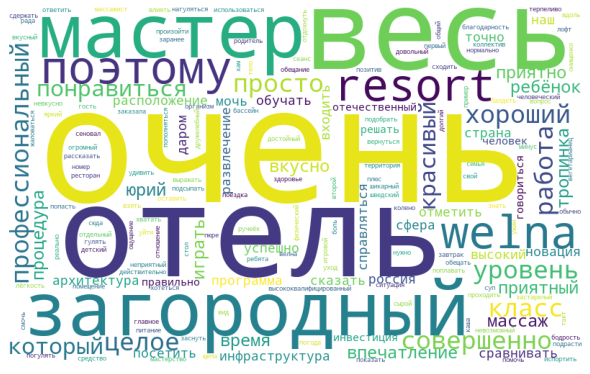

Глэмпинг Под небом


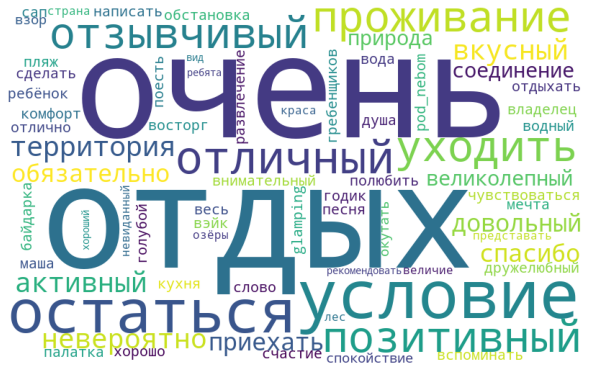

Гуляй-Город


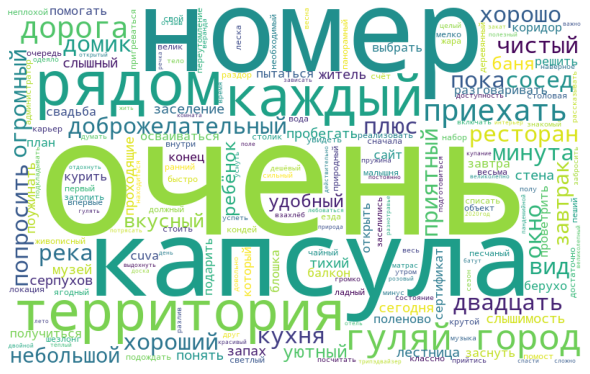

Глэмпинг Китовый Берег
Zelenaya Tropa


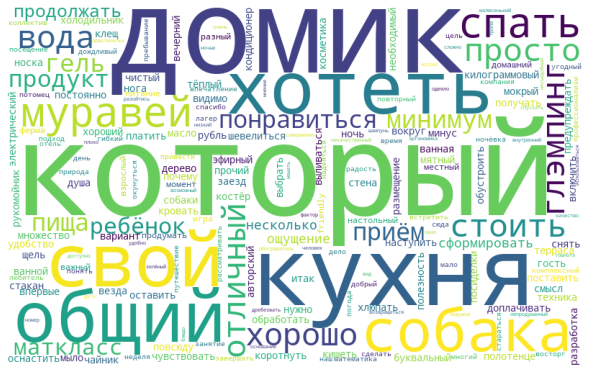

Мамонт Camp


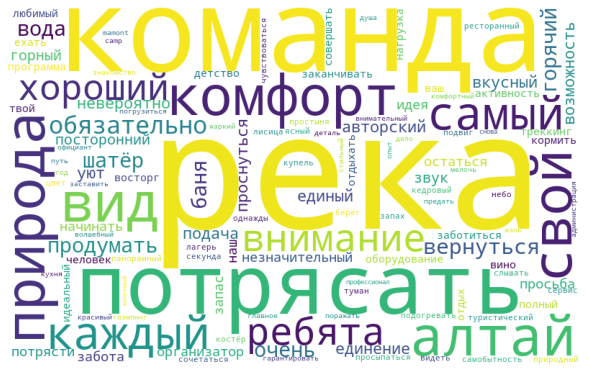

Скала


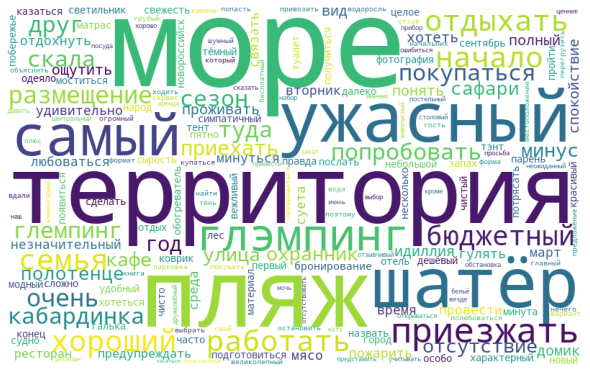

Халактырский пляж
Шикша


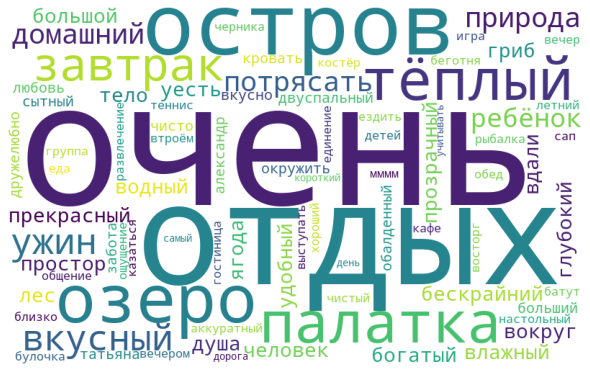

База отдыха Салокюля


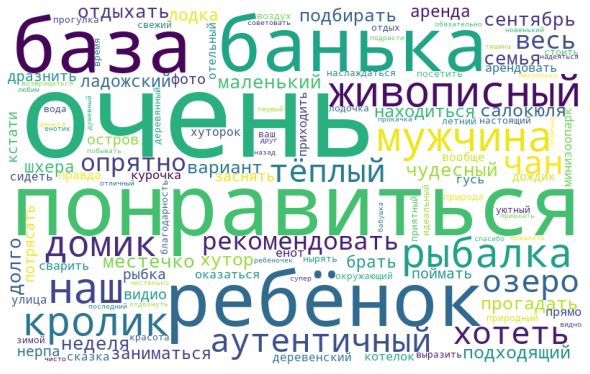

Дальний кордон


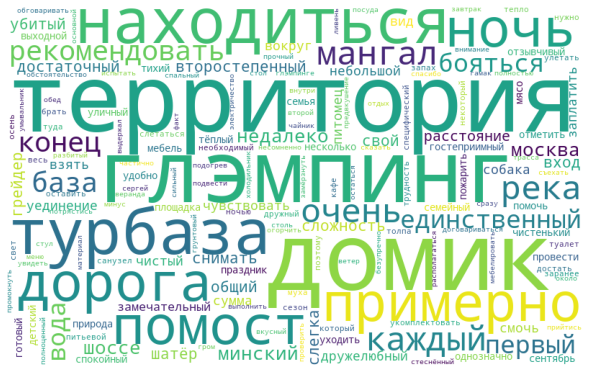

Айвенго


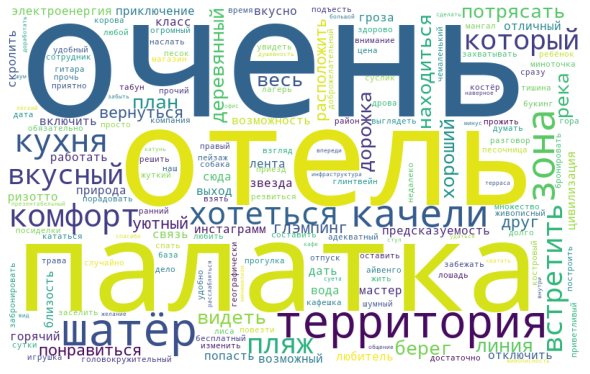

Папоротник


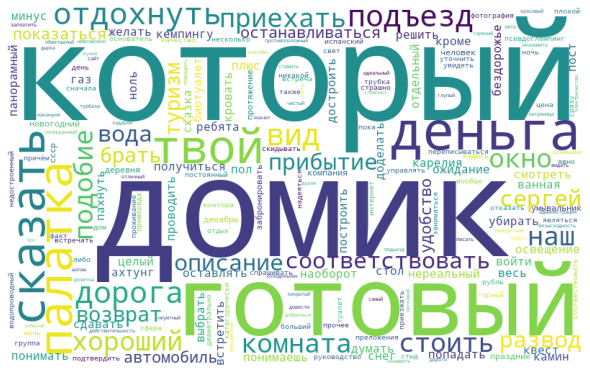

Polyana Glamping


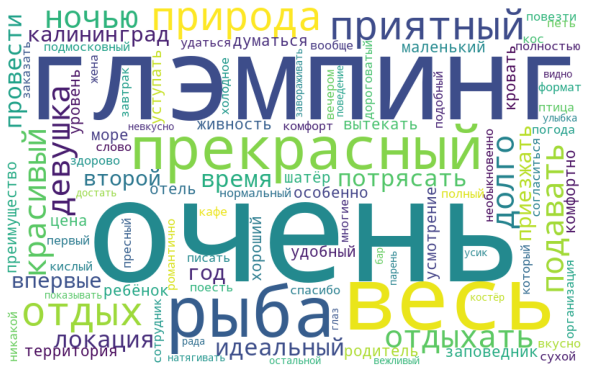

Кемпинг Лес и Море


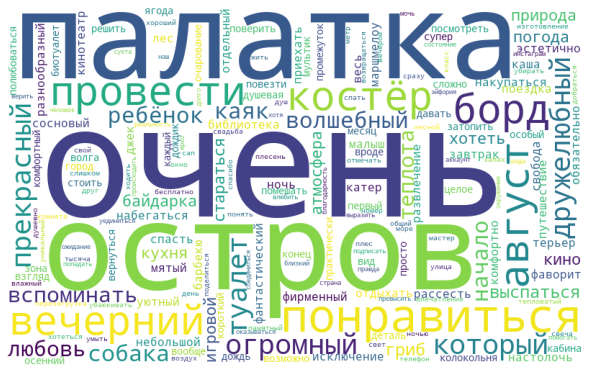

Майтри Кэмп на Финском Заливе


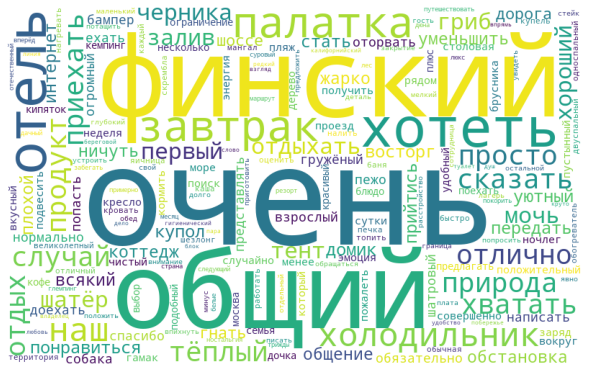

Глэмпинг Северный Крым
Трувор Глэмпинг Валдай


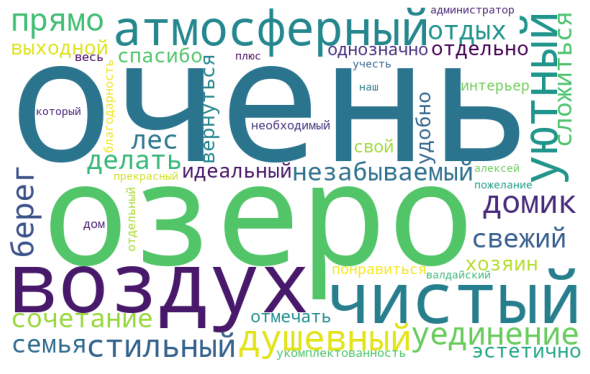

Глемпинг Старый Сивух


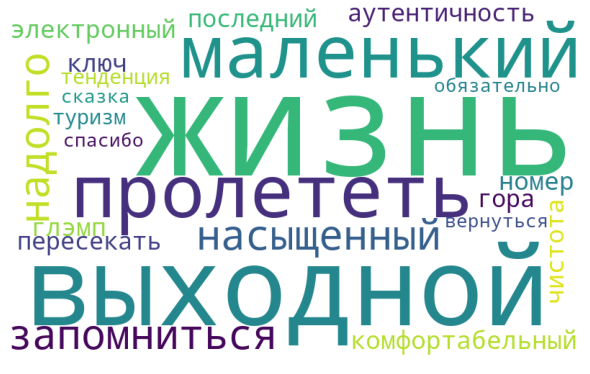

Долина мечтателей
Eko-camping SFERA


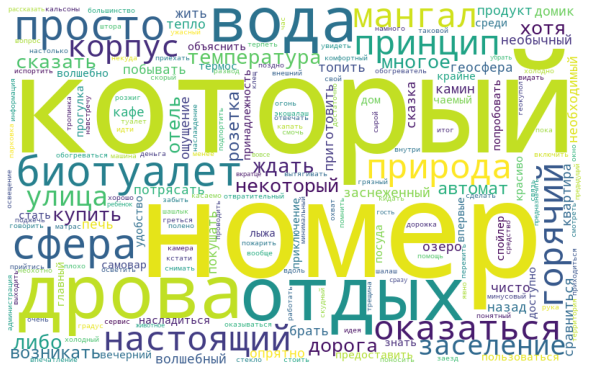

СПА ЛЕС глэмпинг
Глэмпинг Под Небом


In [104]:
for t in range(ready_for_clouds['places'].size):
    words_list = ready_for_clouds[ready_for_clouds['places'] == ready_for_clouds.iat[t,0]]['positive_reviews'].tolist()[0]
    pos_words = ' '.join(words_list)
    
    if pos_words != '':
        
        pos_wordcloud =  WordCloud(background_color = 'white', width=800, height = 500, stopwords = stop).generate(pos_words)

        plt.figure(figsize=(8, 8), facecolor = None)
        plt.imshow(pos_wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        print(ready_for_clouds['places'][t])
        plt.show()
    else:
        print(ready_for_clouds['places'][t])

Глэмпинг Доброе
Глэмпинг на озере Сиг


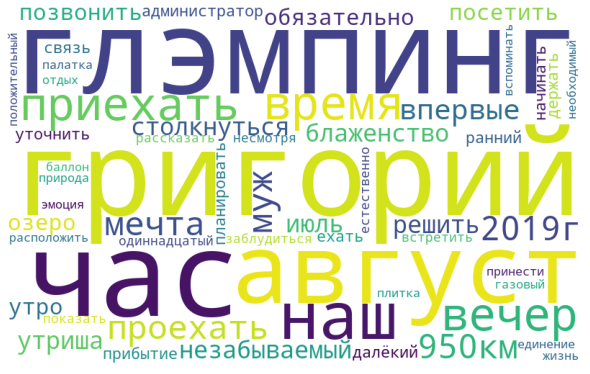

Глэмпинг Видно Озеро


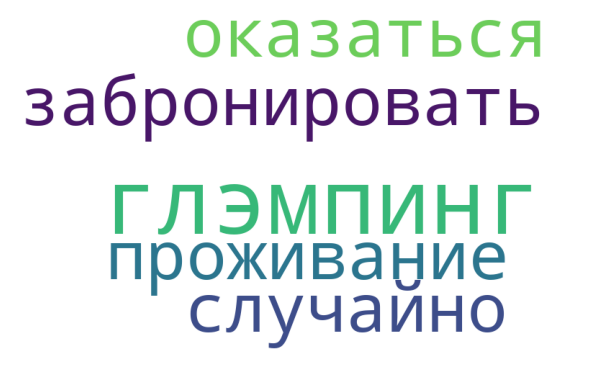

Глэмпинг Vezzika
ЛЕС Глэмпинг и спа


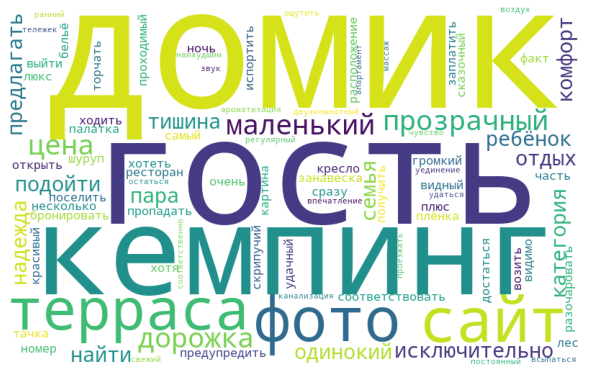

Глэмпинг NewCamp


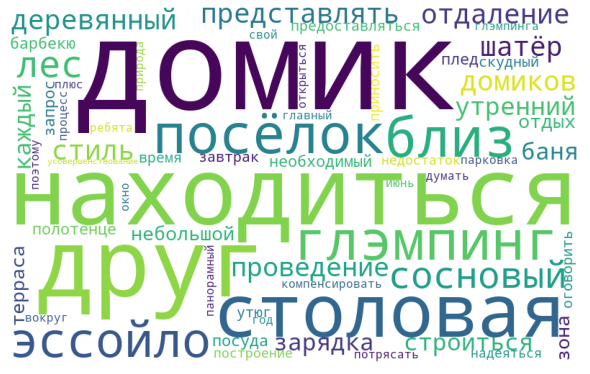

Urman Camp Глэмпинг


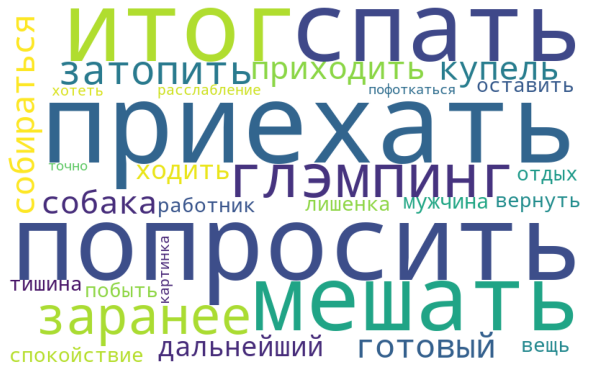

Велна Эко Спа Резорт


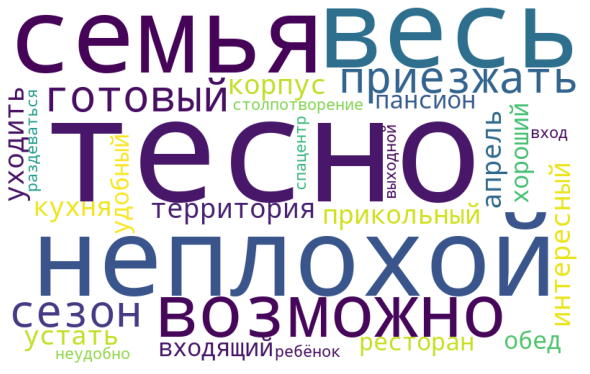

Глэмпинг Под небом


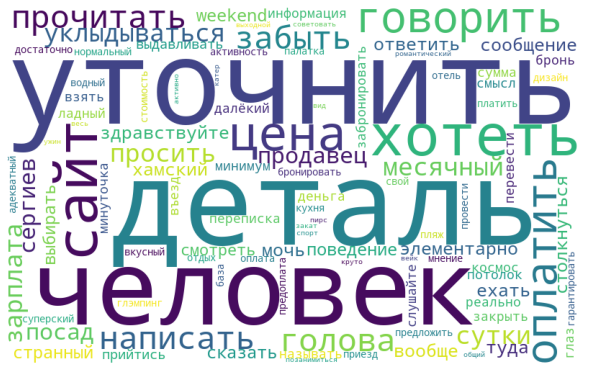

Гуляй-Город
Глэмпинг Китовый Берег


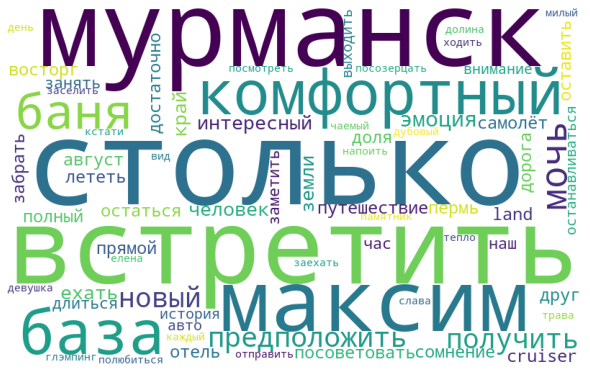

Zelenaya Tropa


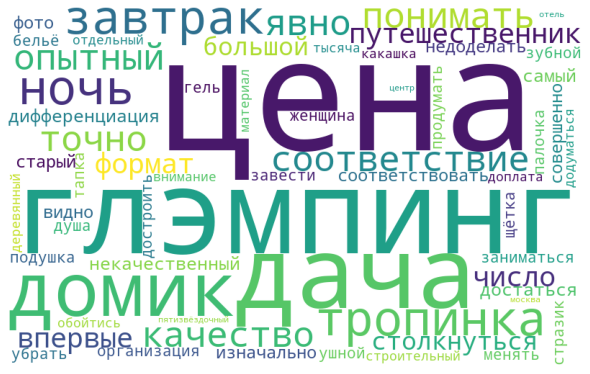

Мамонт Camp
Скала


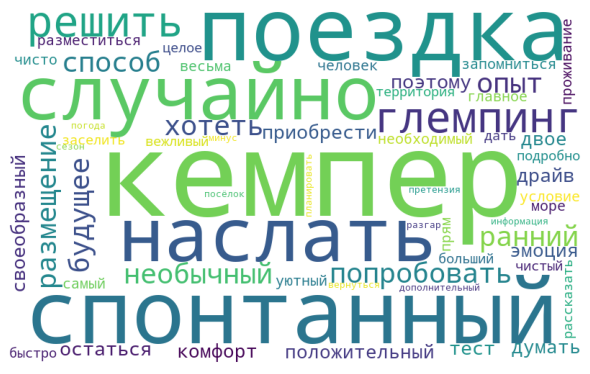

Халактырский пляж
Шикша


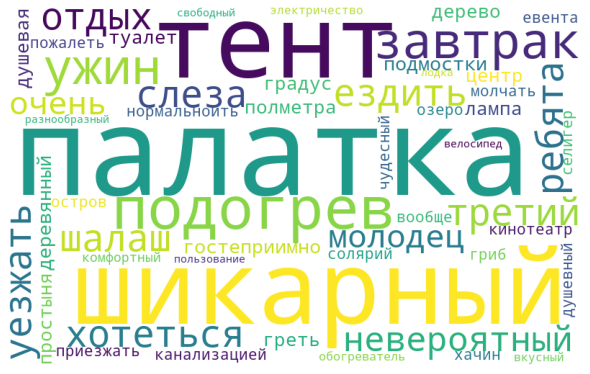

База отдыха Салокюля
Дальний кордон
Айвенго


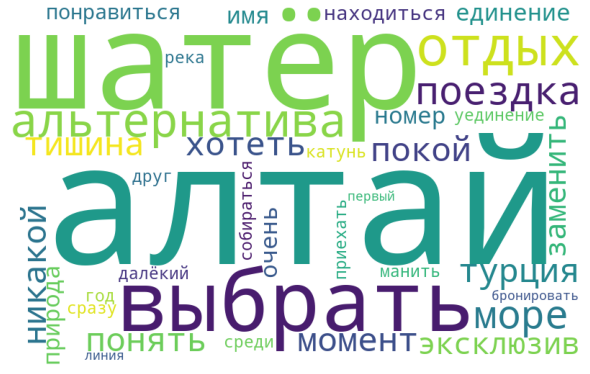

Папоротник


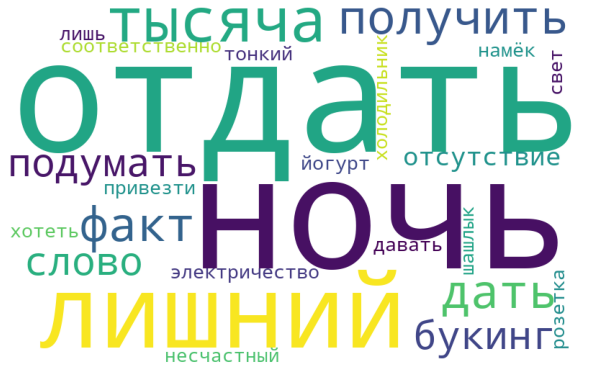

Polyana Glamping


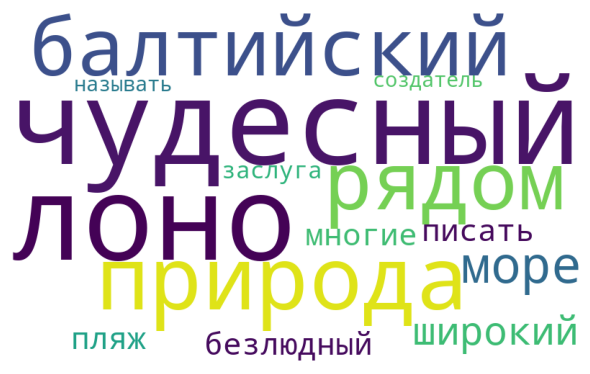

Кемпинг Лес и Море
Майтри Кэмп на Финском Заливе


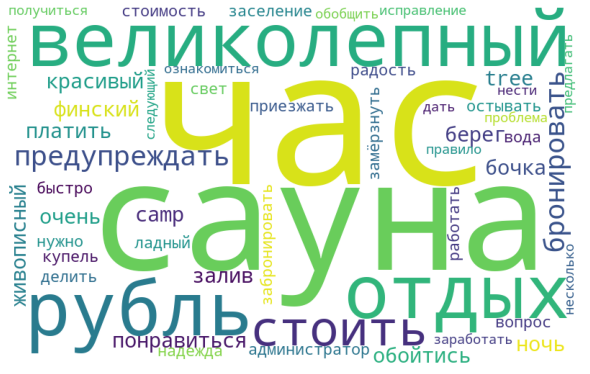

Глэмпинг Северный Крым


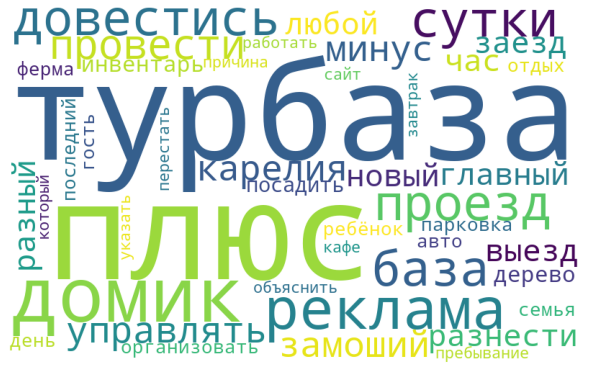

Трувор Глэмпинг Валдай
Глемпинг Старый Сивух
Долина мечтателей
Eko-camping SFERA


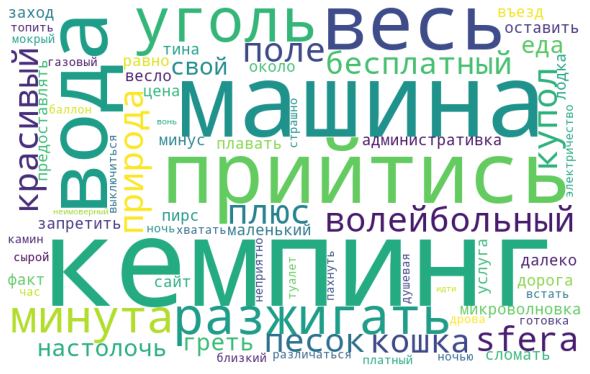

СПА ЛЕС глэмпинг
Глэмпинг Под Небом


In [106]:
for t in range(ready_for_clouds['places'].size):
    words_list = ready_for_clouds[ready_for_clouds['places'] == ready_for_clouds.iat[t,0]]['negative_reviews'].tolist()[0]
    neg_words = ' '.join(words_list)
    
    if neg_words != '':
        
        neg_wordcloud =  WordCloud(background_color = 'white', width=800, height = 500, stopwords = stop).generate(neg_words)

        plt.figure(figsize=(8, 8), facecolor = None)
        plt.imshow(neg_wordcloud)
        plt.axis("off")
        plt.tight_layout(pad=0)
        print(ready_for_clouds['places'][t])
        plt.show()
    else:
        print(ready_for_clouds['places'][t])